# Le variabili macroeconomiche

In questa prima sezione verranno presentate alcune delle principali variabili macroeconomiche, e si mostrerà come estrarre le serie storiche dai database di Eurostat e BCE utilizzando Python. In ordine, verranno presentate:  
1. PIL, ovvero la produzione aggregata dell'economia, indicativo del grado di salute dell'economia
2. tasso di disoccupazione, che riveste fondamentale importanza soprattutto per la FED
3. inflazione, di cruciale rilevanza in Europa, in quanto mantenere la stabilità dei prezzi è il principale compito della BCE

In [1]:
from config import *
from config import make_df_ECB
%matplotlib inline

## Produzione Aggregata

### Definizione

La misura della produzione aggregata nella contabilità nazionale è chiamata <b>prodotto interno lordo</b>, o <b>PIL</b>.
Il PIL può essere definito in tre modi equivalenti:
<ol>
    <li>Il PIL è il valore dei beni e dei servizi finali prodotti nell'economia in un dato periodo di tempo</li>
    <li>Il PIL è la somma del valore aggiunto nell'economia in un dato periodo di tempo</li>
    <li>Il PIL è la somma dei redditi dell'economia in un dato periodo di tempo</li>
</ol>
Dalla definizione (3) deriva che, in una economia, produzione aggregata e reddito aggregato siano sempre uguali

### Come si misura il PIL?

Normalmente, le informazioni sono raccolte dalle autorità fiscali di un paese:
<ol>
    <li>Le imprese registrano le proprie vendite</li>
    <li>Le imprese pagano tasse sul valore aggiunto</li>
    <li>Gli individui dichiarano il reddito percepito</li>
</ol>

### PIL nominale e PIL reale

Il <b>PIL nominale</b> è la somma del valore dei beni finali valutati al loro prezzo corrente, dunque la sua crescita è influenzata da I. l'aumento della produzione II. l'aumento dei prezzi.
Il <b>PIl reale</b> è la somma del valore dei beni finali valutati a prezzi costanti: di solito si utilizzano i prezzi di un anno di riferimento

### PIL pro capite

Spesso, per misurare il tenore di vita in un paese, si utilizza il PIL pro capite, ovvero il PIL reale diviso per la popolazione del paese

C:\Users\Marco\marco-bernardini.github.io\notebooks\config.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


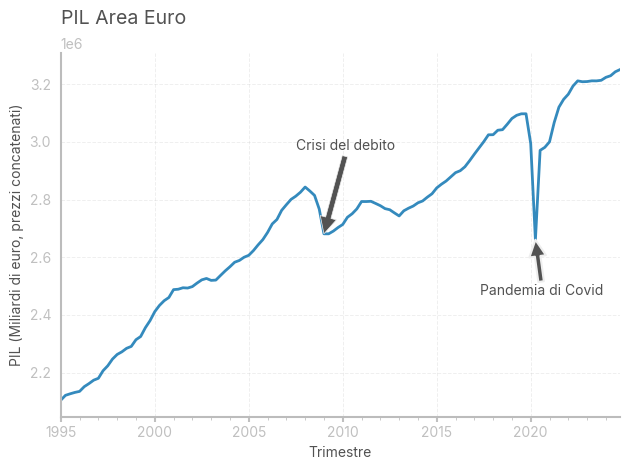

In [2]:
# Creazione del DataFrame con i dati del PIL dell'Area Euro
# La chiave specificata corrisponde al PIL reale trimestrale in euro a prezzi concatenati
PIL_KEY = 'MNA/Q.Y.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.LR.N'
pil = make_df_ECB(PIL_KEY, 'PIL')

"""
Descrizione della serie:
La serie utilizzata rappresenta il PIL reale dell'Area Euro con dati trimestrali (Q).
I valori sono espressi in miliardi di euro (EUR) a prezzi concatenati (LR), il che significa
che sono corretti per l'inflazione e consentono un confronto diretto nel tempo.

Caratteristiche principali:
- Frequenza: Trimestrale (Q)
- Valuta: Euro (EUR) a prezzi concatenati (LR)
- Area geografica: Area Euro (I9)
- Settore: Settore istituzionale totale (S1)
- Fonte: BCE (Banca Centrale Europea)
- Periodi di interesse: 
  - Crisi del debito europeo (2009) con una significativa contrazione del PIL.
  - Pandemia di Covid-19 (2020) con una forte caduta seguita da una ripresa.
"""

# Creazione del grafico del PIL
pil.plot()
plt.title('PIL Area Euro', loc='left')  # Titolo del grafico posizionato a sinistra
plt.xlabel('Trimestre')  # Etichetta dell'asse x
plt.ylabel('PIL (Miliardi di euro, prezzi concatenati)')  # Etichetta dell'asse y
plt.legend().set_visible(False)  # Nasconde la legenda per migliorare la leggibilità

# Annotazione della crisi del debito europeo (2009)
plt.annotate('Crisi del debito', 
             xy=('2009Q1', pil.loc['2009-01-01']), 
             xytext=(-20, 60),  # Offset del testo
             textcoords='offset points',  # Specifica l'offset in punti
             arrowprops=dict(facecolor='#525252', lw=0.5),  # Stile della freccia
             color='#525252')  # Colore del testo

# Annotazione della pandemia di Covid-19 (2020)
plt.annotate('Pandemia di Covid', 
             xy=('2020Q2', pil.loc['2020-04-01']), 
             xytext=(-40, -40),  # Offset del testo
             textcoords='offset points',  # Specifica l'offset in punti
             arrowprops=dict(facecolor='#525252', lw=1.5),  # Stile della freccia
             color='#525252')  # Colore del testo

plt.tight_layout()  # Ottimizzazione del layout per evitare sovrapposizioni
plt.show()

### Tasso di crescita del PIL

Spesso, si utilizza il concetto di crescita del PIL per indicare espansioni (periodi di crescita positiva) e recessioni (almeno due trimestri consecutivi di crescita negativa).<br>
Il tasso di crescita del PIL è semplicemente definito come:
$
\frac{Y_t - Y_{t-1}}{Y_{t-1}} \approx \ln Y_t - \ln Y_{t-1}
$

C:\Users\Marco\marco-bernardini.github.io\notebooks\config.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


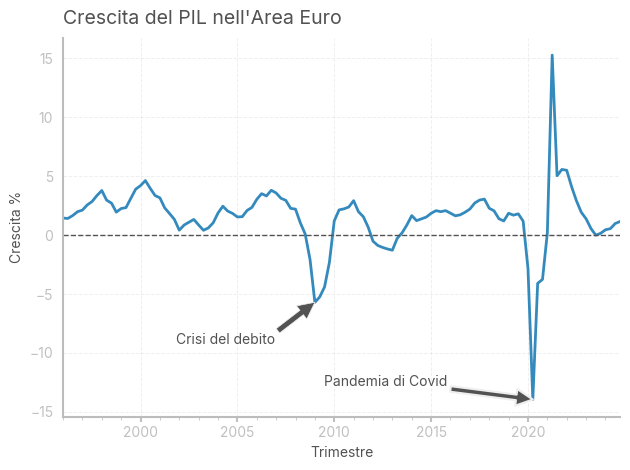

In [3]:
# Creazione del DataFrame con i dati della crescita del PIL reale
# La chiave specificata corrisponde alla crescita del PIL reale trimestrale in termini percentuali
REAL_GDP_GROWTH_KEY = 'MNA/Q.Y.I9.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.LR.GY'
real_gdp_growth = make_df_ECB(REAL_GDP_GROWTH_KEY, 'Crescita PIL')

"""
Descrizione della serie:
La serie rappresenta la crescita percentuale del PIL reale dell'Area Euro con dati trimestrali (Q).
Misura il tasso di variazione del PIL rispetto al trimestre precedente, esprimendolo in termini percentuali.

Caratteristiche principali:
- Frequenza: Trimestrale (Q)
- Valuta: Euro (EUR) a prezzi concatenati (LR)
- Indicatore: Crescita percentuale del PIL reale (GY)
- Area geografica: Area Euro (I9)
- Settore: Settore istituzionale totale (S1)
- Fonte: BCE (Banca Centrale Europea)
- Periodi di interesse:
  - Crisi del debito europeo (2009) con crescita negativa e recessione prolungata.
  - Pandemia di Covid-19 (2020) con una caduta storica seguita da un rimbalzo.
"""

# Creazione del grafico della crescita del PIL
real_gdp_growth.plot()
plt.title('Crescita del PIL nell\'Area Euro', loc='left')  # Titolo del grafico posizionato a sinistra
plt.xlabel('Trimestre')  # Etichetta dell'asse x
plt.ylabel('Crescita %')  # Etichetta dell'asse y
plt.legend().set_visible(False)  # Nasconde la legenda per migliorare la leggibilità

# Aggiunta di una linea orizzontale per evidenziare il valore zero (assenza di crescita)
plt.axhline(y=0, color='#525252', linestyle='--', linewidth=1)

# Annotazione della crisi del debito europeo (2009)
plt.annotate('Crisi del debito', 
             xy=('2009Q1', real_gdp_growth.loc['2009-01-01']), 
             xytext=(-100, -30),  # Offset del testo
             textcoords='offset points',  # Specifica l'offset in punti
             arrowprops=dict(facecolor='#525252', lw=0.5),  # Stile della freccia
             color='#525252')  # Colore del testo

# Annotazione della pandemia di Covid-19 (2020)
plt.annotate('Pandemia di Covid', 
             xy=('2020Q2', real_gdp_growth.loc['2020-04-01']), 
             xytext=(-150, 10),  # Offset del testo
             textcoords='offset points',  # Specifica l'offset in punti
             arrowprops=dict(facecolor='#525252', lw=1.5),  # Stile della freccia
             color='#525252')  # Colore del testo

plt.tight_layout()  # Ottimizzazione del layout per evitare sovrapposizioni
plt.show()

### La composizione del PIL

Per comprendere cosa determini la domanda di beni, si può scomporre la produzione aggregata in base alla tipologia di acquirente dei beni. Si possono individuare cinque componenti:
<ol>
    <li>Il consumo (<b>C</b>), ovvero beni e servizi acquistati dai consumatori, ovvero le famiglie</li>
    <li>L'investimento (<b>I</b>) che include l'investimento non residenziale (impianti e macchinari) da parte delle aziende, e l'investimento residenziale da parte delle famiglie</li>
    <li>La spesa pubblica in beni e servizi (<b>G</b>), ovvero i beni acquistati dallo stato e dagli enti pubblici. Si noti che non fanno parte di questa categoria pensioni, servizi assistenziali quali il reddito di cittadinanza, o gli interessi pagati sul debito.</li>
    <li>Importazioni (<b>IM</b>), che entrano nell'equazione con segno negativo</li>
    <li>Esportazioni (<b>X</b>), che entrano nell'equazione con segno positivo</li>
</ol>
Si ha dunque che: $Y = C + I + G + (X - IM)$<br>
Dove spesso si usa parlare di esportazioni nette o saldo commerciale del termine $X - IM$.

C:\Users\Marco\marco-bernardini.github.io\notebooks\config.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
C:\Users\Marco\marco-bernardini.github.io\notebooks\config.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
C:\Users\Marco\marco-bernardini.github.io\notebooks\config.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
C:\Users\Marco\marco-bernardini.github.io\notebooks\config.py:78: UserWarning: Cou

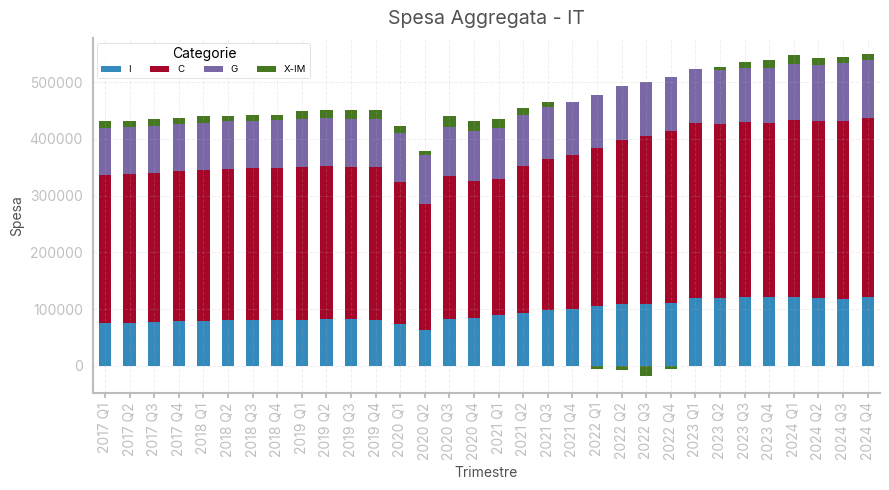

In [4]:
# Definisco le chiavi per i vari indicatori economici relativi all'Italia
# La struttura di ogni chiave segue il formato: 
# MNA/Q.Y.IT.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.V.N

IT_gdp_key = 'MNA/Q.Y.IT.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.V.N'  # PIL (Prodotto Interno Lordo)

IT_inv_key = 'MNA/Q.Y.IT.W0.S1.S1.D.P51G.N11G._T._Z.EUR.V.N'  # Investimenti

IT_cons_key = 'MNA/Q.Y.IT.W0.S1M.S1.D.P31._Z._Z._T.EUR.V.N'  # Consumi

IT_gov_exp_key = 'MNA/Q.Y.IT.W0.S13.S1.D.P3._Z._Z._T.EUR.V.N'  # Spesa Pubblica

IT_imp_key = 'MNA/Q.Y.IT.W1.S1.S1.C.P7._Z._Z._Z.EUR.V.N'  # Importazioni

IT_exp_key = 'MNA/Q.Y.IT.W1.S1.S1.D.P6._Z._Z._Z.EUR.V.N'  # Esportazioni

# Creo i DataFrame per ogni indicatore economico utilizzando le chiavi
IT_gdp = make_df_ECB(IT_gdp_key, 'GDP')  # Prodotto Interno Lordo (PIL)
IT_inv = make_df_ECB(IT_inv_key, 'INV')  # Investimenti
IT_cons = make_df_ECB(IT_cons_key, 'CONS')  # Consumi
IT_gov_exp = make_df_ECB(IT_gov_exp_key, 'GOV_EXP')  # Spesa Pubblica
IT_imp = make_df_ECB(IT_imp_key, 'IMP')  # Importazioni
IT_exp = make_df_ECB(IT_exp_key, 'EXP')  # Esportazioni

# Unisco tutti i DataFrame in uno solo per l'analisi aggregata delle spese
import functools as ft
dfs = [IT_gdp, IT_inv, IT_cons, IT_gov_exp, IT_imp, IT_exp]
IT_expenditures = ft.reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

# Calcolo la bilancia commerciale (BOT) come la differenza tra esportazioni e importazioni
IT_expenditures['BOT'] = IT_expenditures['EXP'] - IT_expenditures['IMP']

# Creo un grafico a barre impilate per visualizzare la spesa aggregata
ax = IT_expenditures[['INV', 'CONS', 'GOV_EXP', 'BOT']][-32:].plot.bar(stacked=True, figsize=(9, 5))

# Modifico le etichette dell'asse x per visualizzare l'anno e il trimestre
ax.set_xticklabels([f'{x.year} Q{x.quarter}' for x in IT_expenditures.index[-32:]])

# Aggiungo il titolo e le etichette degli assi
plt.title('Spesa Aggregata - IT')
plt.xlabel('Trimestre')
plt.ylabel('Spesa')

# Aggiungo una legenda con le categorie di spesa
ax.legend(['I', 'C', 'G', 'X-IM', 'Y'],
          title='Categorie',
          loc='upper left',      
          frameon=True,
          fontsize='x-small',
          ncol=4
          )

# Adatto il layout per evitare sovrapposizioni
plt.tight_layout()

### PIL e PNL

In alcuni casi, è utile distinguere tra:<br>
<b>PIL</b>, che misura il valore totale dei beni e servizi prodotti all'interno di un paese, indipendentemente dalla proprietà delle risorse e <b>PNL (Prodotto Nazionale Lordo)</b>, che misura il valore totale dei beni e servizi prodotti da cittadini di un paese, indipendentemente da dove si trovino nel mondo.<br>
Sono emblematici il caso tedesco e quello irlandese.

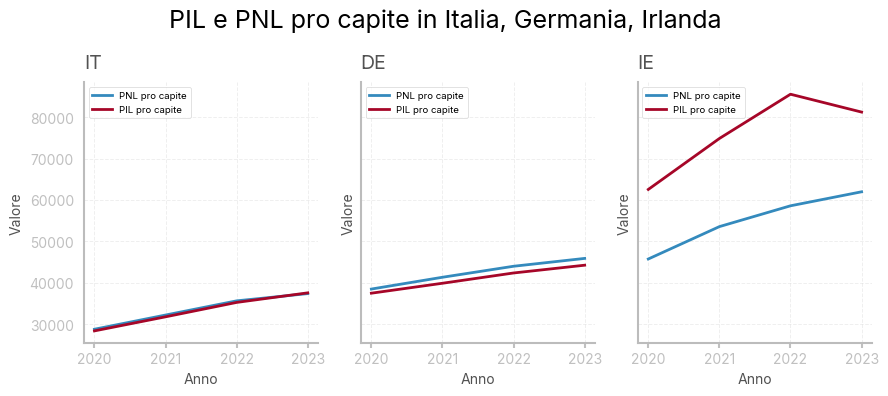

In [5]:
# Definiamo le colonne di interesse per i dati
cols = ['geo\TIME_PERIOD', '2020', '2021', '2022', '2023']

# Otteniamo i dati del Prodotto Nazionale Lordo (PNL) pro capite
gni_pc_tuples = eurostat.get_data('nama_10_pp')  # Recupera i dati dal database Eurostat
gni_pc = pd.DataFrame(gni_pc_tuples[1:], columns=gni_pc_tuples[0])  # Crea il DataFrame
gni_pc = gni_pc[cols]  # Seleziona solo le colonne di interesse
gni_pc.columns = ['COUNTRY', '2020', '2021', '2022', '2023']  # Rinomina le colonne per chiarezza

# Otteniamo i dati del Prodotto Interno Lordo (PIL) pro capite
gdp_pc_tuples = eurostat.get_data('nama_10_pc')  # Recupera i dati del PIL pro capite
gdp_pc = pd.DataFrame(gdp_pc_tuples[1:], columns=gdp_pc_tuples[0])  # Crea il DataFrame
gdp_pc = gdp_pc.query("unit=='CP_PPS_EU27_2020_HAB' & na_item == 'B1GQ'")  # Filtro per unità e tipo di dato
gdp_pc = gdp_pc[cols]  # Seleziona solo le colonne di interesse
gdp_pc.columns = ['COUNTRY', '2020', '2021', '2022', '2023']  # Rinomina le colonne

# Definiamo la lista dei paesi per i quali vogliamo visualizzare i dati
countries = ['IT', 'DE', 'IE']

# Creiamo un grafico a sottotrame per visualizzare i dati
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(9, 4))  # Crea 3 sottotrame affiancate
axs = axs.flatten()  # Appiattisce l'array di assi per facilitare l'accesso

# Ciclo sui paesi per plottare i dati di ciascuno
for n, country in enumerate(countries):
    # Selezioniamo i dati del paese corrente per PNL e PIL
    gni_pc_country = gni_pc[gni_pc['COUNTRY'] == country].T[1:]  # Trasposta dei dati di PNL
    gdp_pc_country = gdp_pc[gdp_pc['COUNTRY'] == country].T[1:]  # Trasposta dei dati di PIL
    
    # Plottiamo i dati sulla stessa sottotrama
    axs[n].plot(gni_pc_country, label='PNL pro capite')  # PNL
    axs[n].plot(gdp_pc_country, label='PIL pro capite')  # PIL
    
    # Aggiungiamo il titolo e le etichette
    axs[n].set_title(country, loc='left')  # Titolo a sinistra per ogni paese
    axs[n].set_xlabel('Anno')  # Etichetta asse X
    axs[n].set_ylabel('Valore')  # Etichetta asse Y

    # Aggiungiamo la legenda
    axs[n].legend(
        loc='upper left',  # Posizione della legenda
        frameon=True,  # Abilita il frame della legenda
        fontsize='x-small'  # Font di dimensioni piccole
    )

# Titolo principale del grafico
fig.suptitle('PIL e PNL pro capite in Italia, Germania, Irlanda')

# Miglioriamo il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostriamo il grafico
plt.show()


## Tasso di disoccupazione

Il tasso di disoccupazione si calcola come rapporto tra disoccupati (ovvero coloro i quali non hanno un lavoro, ma lo stanno cercando) e la forza lavoro (data dalla somma di occupati e disoccupati). A questo proposito, è importante sottolineare come chi non ha un lavoro, ma non ne sta nemmeno cercando uno, sia considerato fuori dalla forza lavoro, e dunque non incluso nel conteggio dei disoccupati. Si può quindi calcolare il tasso di partecipazione come forza lavoro divisa per il totale della popolazione.

### Come si misura il tasso di disoccupazione?

Generalmente, si effettuano indagini a campione sulle famiglie (Labour Force Surveys)

C:\Users\Marco\marco-bernardini.github.io\notebooks\config.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])


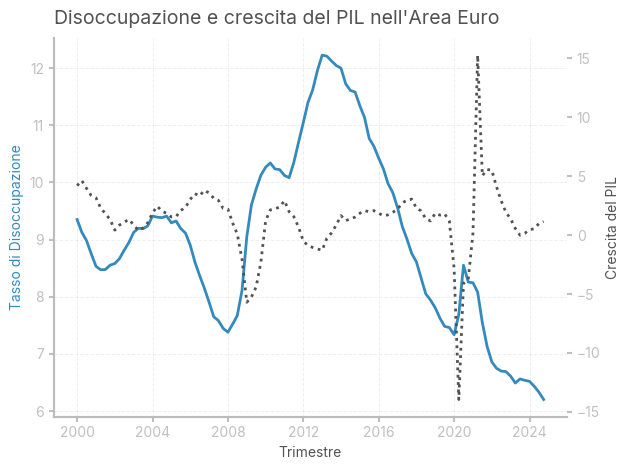

In [6]:
# Chiave per il tasso di disoccupazione
unemp_rate_key = 'LFSI/Q.I9.S.UNEHRT.TOTAL0.15_74.T'  # Codice identificativo del tasso di disoccupazione
unemp_rate = make_df_ECB(unemp_rate_key, 'Unemployment Rate')  # Ottieni i dati dal database ECB

# Creiamo un grafico con due assi
fig, ax1 = plt.subplots()  # Crea una figura e un asse

# Plot del tasso di disoccupazione
ax1.plot(unemp_rate)  # Traccia il grafico del tasso di disoccupazione
ax1.set_xlabel('Trimestre')  # Etichetta per l'asse X
ax1.set_ylabel('Tasso di Disoccupazione', color=bmh_colors[0])  # Etichetta per l'asse Y con colore personalizzato

# Creiamo un secondo asse per la crescita del PIL
ax2 = ax1.twinx()  # Crea un secondo asse Y condiviso sull'asse X
ax2.plot(real_gdp_growth[real_gdp_growth.index >= unemp_rate.index.min()], color='#525252', linestyle=':')  # Traccia il grafico della crescita del PIL con linea tratteggiata
ax2.set_ylabel('Crescita del PIL')  # Etichetta per l'asse Y della crescita del PIL
ax2.grid(False)  # Disabilita la griglia per il secondo asse

# Titolo del grafico
plt.title('Disoccupazione e crescita del PIL nell\'Area Euro', loc='left')  # Aggiungi il titolo a sinistra

# Ottimizza il layout per evitare sovrapposizioni
fig.tight_layout()

# Mostra il grafico
plt.show()

## Tasso di Inflazione

L'inflazione rappresenta un aumento sostenuto del livello generale dei prezzi. Il tasso di inflazione è il tasso a cui il livello dei prezzi aumenta nel tempo.

### Come si misura l'inflazione?

Il livello dei prezzi si può calcolare in due modi:
<ol>
    <li>Utilizzando il deflatore del PIL, ovvero il rapporto tra il PIL nominale e il PIL reale nell'anno di interesse</li>
    <li>Lindice armonizzato dei prezzi al consumo, ovvero un numero indice che fissa un prezzo pari a 100 nell'anno base</li>
</ol>
Chiamando $P_t$ il livello generale dei prezzi nell'anno $t$, segue che il tasso di inflazione $\pi$ viene definito come $\pi =
\frac{P_t - P_{t-1}}{P_{t-1}} \approx \ln P_t - \ln P_{t-1}
$

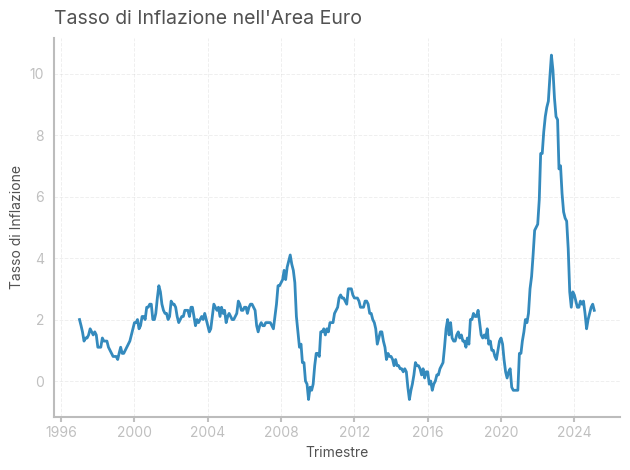

In [7]:
# Chiave per l'Inflation Rate
HICP_key = 'ICP/M.U2.N.000000.4.ANR'  # Codice identificativo dell'Inflation Rate
HICP = make_df_ECB(HICP_key, 'Inflation Rate')  # Ottieni i dati dal database ECB

# Creiamo il grafico
fig, ax = plt.subplots()  # Crea una figura e un asse

# Traccia l'inflazione
ax.plot(HICP)  # Traccia il grafico dell'inflazione

# Imposta etichetta per l'asse X e Y
ax.set_xlabel('Trimestre')  # Etichetta per l'asse X
ax.set_ylabel('Tasso di Inflazione')  # Etichetta per l'asse Y

# Titolo del grafico
plt.title('Tasso di Inflazione nell\'Area Euro', loc='left')  # Aggiungi il titolo a sinistra

# Ottimizza il layout per evitare sovrapposizioni
fig.tight_layout()

# Mostra il grafico
plt.show()